# Within Method Type Comparisons

This notebooks runs a set of comparisons across methods, within method types (eg. comparing different complexity measures to each other). 

It does so for the following method categories (that have multiple methods):
- Fluctuations
- Fractal Dimension
- Complexity
- Entropy

In [1]:
from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_comparisons
from apm.analysis import compute_all_corrs
from apm.plts import plot_dots
from apm.plts.multi import plot_results_all
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.methods import (hurst, dfa, higuchi_fd, katz_fd, petrosian_fd,
                         hjorth_mobility, hjorth_complexity, lempelziv,
                         app_entropy, sample_entropy, perm_entropy, wperm_entropy)
from apm.methods.settings import (HURST_PARAMS, DFA_PARAMS,
                                  HFD_PARAMS, KFD_PARAMS, PFD_PARAMS,
                                  HJM_PARAMS, HJC_PARAMS, LZ_PARAMS,
                                  AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.utils import print_corr_combs
from apm.sim.defs import SIM_SAMPLERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Settings for running comparisons
RETURN_PARAMS = True

In [5]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '41_within_comp'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [6]:
# Collect together info & plot settings
dot_kwargs = {'s' : 25, 'alpha' : 0.25}

In [7]:
# Update data specific settings
HURST_PARAMS['fs'] = SIM_SAMPLERS.fs
DFA_PARAMS['fs'] = SIM_SAMPLERS.fs

In [8]:
# Set the random seed
set_random_seed(111)

## Fluctuations

In [9]:
# Define measures to apply - fluctuations
measures_fluc = {
    hurst : HURST_PARAMS,
    dfa : DFA_PARAMS,
}

In [10]:
# Run simulations, comparing fluctuation measures
results_fluc, all_sim_params_fluc = run_comparisons(\
    sim_combined, SIM_SAMPLERS['comb_sampler'], measures_fluc, return_params=RETURN_PARAMS)

In [11]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fluc = compute_all_corrs(results_fluc)
all_corrs_osc_fluc = compute_all_corrs(results_fluc, all_sim_params_fluc['has_osc'].values)
all_corrs_no_osc_fluc = compute_all_corrs(results_fluc, ~all_sim_params_fluc['has_osc'].values)

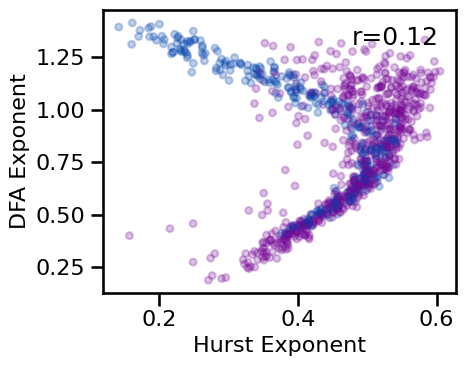

In [12]:
# Plot comparisons
cs = [COLORS['COMB'] if osc else COLORS['AP'] for osc in all_sim_params_fluc.has_osc]
plot_dots(results_fluc['hurst'], results_fluc['dfa'], tposition='tr', c=cs, **dot_kwargs,
          xlabel='Hurst Exponent', ylabel='DFA Exponent', figsize=(5, 4), **fsaver('fluc_comp'))

In [13]:
# Print correlations between different fluctuation measures
print_corr_combs(all_corrs_fluc)

Correlations:
  HE     & DFA   :   r=+0.121  CI[+0.041, +0.202],  p=0.000


### Fluctuations Notes

The relationship between fluctuations measures (Hurst Exponent and DFA) is non-linear and there does not appear to be a clear / direct mapping between the two. Despite the similarities of these methods, they seem be fairly different in what they measure in the data. 

## Fractal Dimension

In [14]:
# Define measures to apply - fractal dimension
measures_fd = {
    higuchi_fd : HFD_PARAMS,
    katz_fd : KFD_PARAMS,
    petrosian_fd : PFD_PARAMS,
}

In [15]:
# Run simulations, comparing fractal dimension measures
results_fd, all_sim_params_fd = run_comparisons(\
    sim_combined, SIM_SAMPLERS['comb_sampler'], measures_fd, return_params=RETURN_PARAMS)

In [16]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fd = compute_all_corrs(results_fd)
all_corrs_osc_fd = compute_all_corrs(results_fd, all_sim_params_fd['has_osc'].values)
all_corrs_no_osc_fd = compute_all_corrs(results_fd, ~all_sim_params_fd['has_osc'].values)

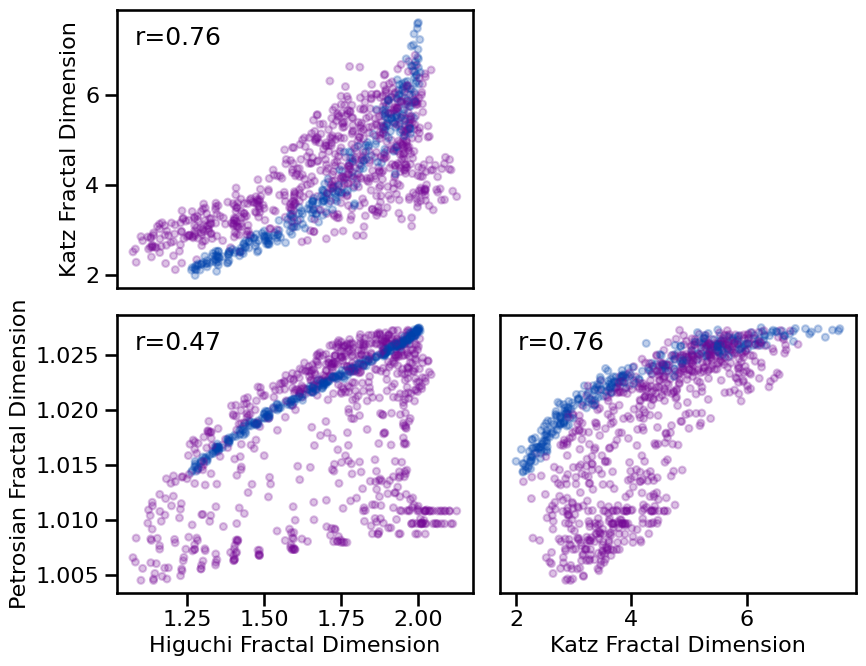

In [17]:
# Plot comparisons across fractal dimension measures
cs = [COLORS['COMB'] if osc else COLORS['AP'] for osc in all_sim_params_fd.has_osc]
plot_results_all(results_fd, figsize=(9, 7), tposition='tl', c=cs,
                 **dot_kwargs, **fsaver('fractal_comp'))

In [18]:
# Print correlations between different fractal measures
print_corr_combs(all_corrs_fd)

Correlations:
  HFD    & KFD   :   r=+0.763  CI[+0.731, +0.790],  p=0.000
  HFD    & PFD   :   r=+0.470  CI[+0.406, +0.529],  p=0.000
  KFD    & PFD   :   r=+0.765  CI[+0.739, +0.788],  p=0.000


### Fractal Dimension Notes

Overall, there is a general consistency across the fractal dimension measures, notably that they are positively correlated with each other. In this sense they are quite consistent, though note that the actual magnitudes of the estimates vary significantly across the different methods.

## Complexity

In [19]:
# Define measures to apply - complexity
measures_cp = {
    hjorth_mobility : HJM_PARAMS,
    hjorth_complexity : HJC_PARAMS,
    lempelziv : LZ_PARAMS,
}

In [20]:
# Run simulations, comparing complexity measures
results_cp, all_sim_params_cp = run_comparisons(\
    sim_combined, SIM_SAMPLERS['comb_sampler'], measures_cp, return_params=RETURN_PARAMS)

In [21]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_cp = compute_all_corrs(results_cp)
all_corrs_osc_cp = compute_all_corrs(results_cp, all_sim_params_cp['has_osc'].values)
all_corrs_no_osc_cp = compute_all_corrs(results_cp, ~all_sim_params_cp['has_osc'].values)

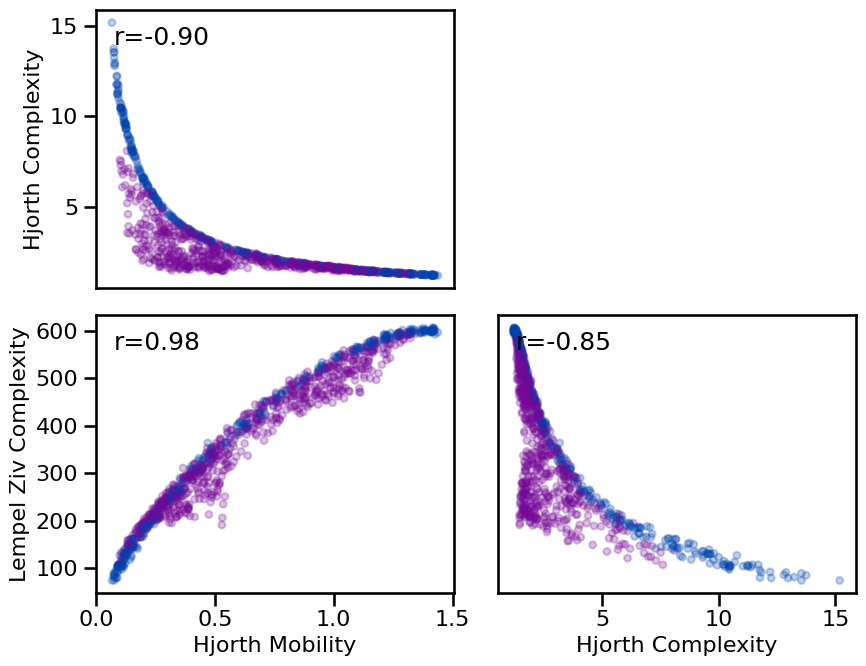

In [22]:
# Plot comparisons across complexity measures
cs = [COLORS['COMB'] if osc else COLORS['AP'] for osc in all_sim_params_cp.has_osc]
plot_results_all(results_cp, figsize=(9, 7), tposition='tl', c=cs,
                 **dot_kwargs, **fsaver('compl_comp'))

In [23]:
# Print correlations between different complexity measures
print_corr_combs(all_corrs_cp)

Correlations:
  HJM    & HJC   :   r=-0.904  CI[-0.920, -0.884],  p=0.000
  HJM    & LZC   :   r=+0.985  CI[+0.981, +0.988],  p=0.000
  HJC    & LZC   :   r=-0.849  CI[-0.874, -0.820],  p=0.000


### Complexity Notes

The complexity methods included here are quite highly correlated with each other, though notably in varying directions. Notably, all the relationships between estimates are quite non-linear. Overall, this suggests that while they capture similar aspects of the data, there is a not a direct one-to-one mapping between the different measures, and also the scales appear to go in different directions across different measures. 

## Entropy

In [24]:
# Define measures to apply - entropy
measures_ent = {
    app_entropy : AP_ENT_PARAMS,
    sample_entropy : SA_ENT_PARAMS,
    perm_entropy : PE_ENT_PARAMS,
    wperm_entropy : WPE_ENT_PARAMS,
}

In [25]:
# Run simulations, comparing entropy measures
results_ent, all_sim_params_ent = run_comparisons(\
    sim_combined, SIM_SAMPLERS['comb_sampler'], measures_ent, return_params=RETURN_PARAMS)

In [26]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_ent = compute_all_corrs(results_ent)
all_corrs_osc_ent = compute_all_corrs(results_ent, all_sim_params_ent['has_osc'].values)
all_corrs_no_osc_ent = compute_all_corrs(results_ent, ~all_sim_params_ent['has_osc'].values)

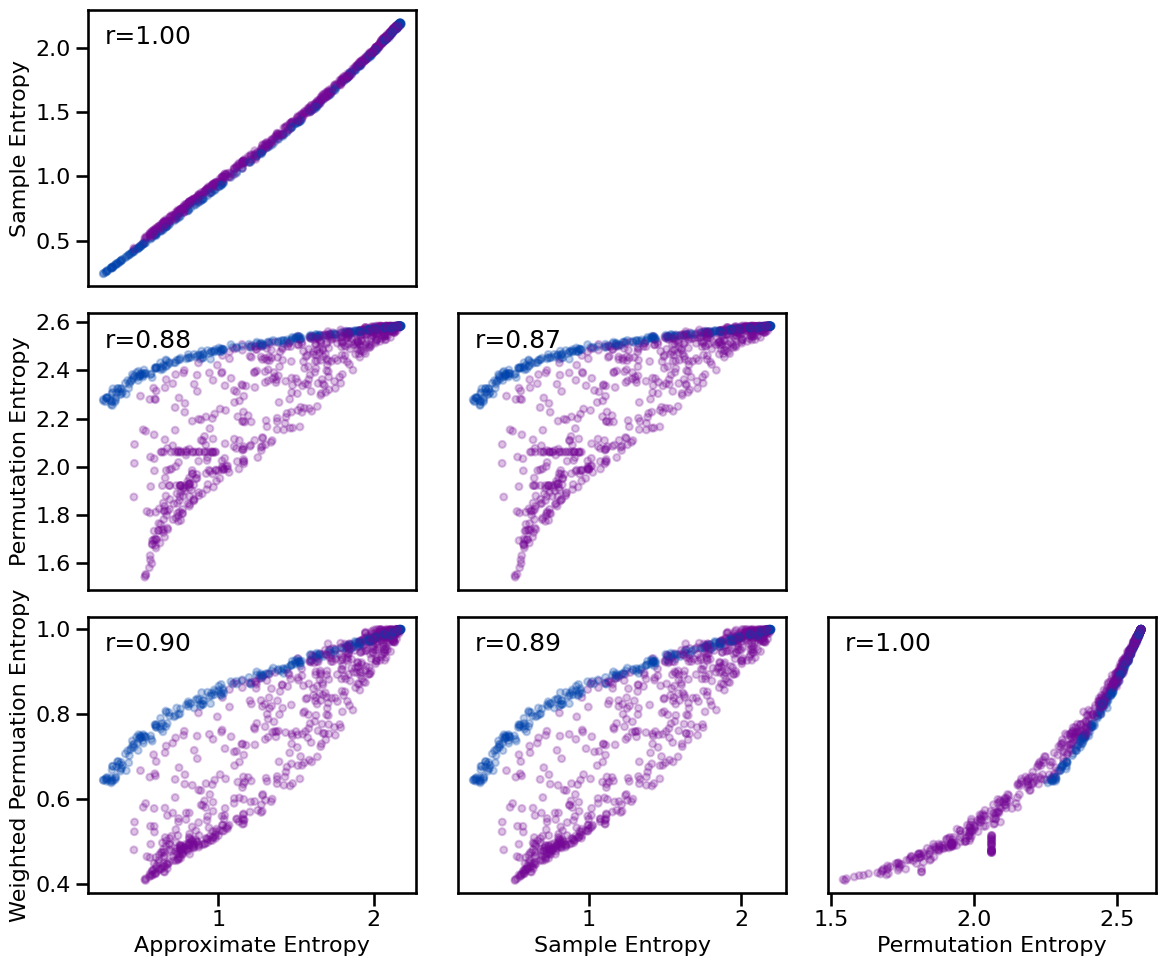

In [27]:
# Plot comparisons across entropy measures
cs = [COLORS['COMB'] if osc else COLORS['AP'] for osc in all_sim_params_ent.has_osc]
plot_results_all(results_ent, figsize=(12, 10), tposition='tl', c=cs,
                 **dot_kwargs, **fsaver('ent_comp'))

In [28]:
# Print correlations between different entropy measures
print_corr_combs(all_corrs_ent)

Correlations:
  ApEn   & SampEn:   r=+1.000  CI[+0.999, +1.000],  p=0.000
  ApEn   & PeEn  :   r=+0.883  CI[+0.867, +0.897],  p=0.000
  ApEn   & wPeEn :   r=+0.901  CI[+0.887, +0.912],  p=0.000
  SampEn & PeEn  :   r=+0.874  CI[+0.857, +0.888],  p=0.000
  SampEn & wPeEn :   r=+0.893  CI[+0.878, +0.905],  p=0.000
  PeEn   & wPeEn :   r=+0.997  CI[+0.997, +0.998],  p=0.000


### Entropy Notes

There is generally a fairly high degree of similarity across the different entropy methods - notably, they are all highly positively correlated. The most notable difference is perhaps the degree to which some methods / pairs of methods differentiate more between signals with/without oscillations. 

## Conclusions

Overall, through these comparisons, we can see that of the included methods, some groupings have similar properties / results, but not all - even within a category there can be notably differences in the results across different data. Overall, this is not too surprising, though these categories are grouped based on having some commonalities, it is not the case that all methods within a category are _supposed_ to estimate the same quantity. 